Use Boolean masks to examine and manipulate values within NumPy arrays

## Comparison Operators as ufuncs

In [20]:
x = np.array([1, 2, 3, 4, 5])

In [21]:
x 

array([1, 2, 3, 4, 5])

In [22]:
x < 3

array([ True,  True, False, False, False])

In [25]:
x >= 3

array([False, False,  True,  True,  True])

Element-wise comparison of two arrays

In [24]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

In [26]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [27]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## Boolean Arrays

In [28]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

### Counting entries

`np.count_nonzero`: count the number of `True` entries

In [29]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [30]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

Another way to get at this information is to use `np.sum`; in this case, `False` is interpreted as `0`, and `True` is interpreted as `1`:

In [31]:
np.sum(x < 6)

8

In [32]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

If we're interested in quickly checking whether any or all the values are true, we can use (you guessed it) `np.any` or `np.all`:

In [33]:
# are there any values greater than 8?
np.any(x > 8)

True

In [34]:
# are all values less than 10?
np.all(x < 10)

True

In [35]:
# are all values equal to 6?
np.all(x == 6)

False

Note: Python has built-in `sum()`, `any()`, and `all()` functions. These have a different syntax than the NumPy versions, and in particular will fail or produce unintended results when used on multidimensional arrays. 

### Boolean operators

| Operator | Equivalent ufunc |
| -------- | ---------------- |
| `&`      | `np.bitwise_and` |
| `^`      | `np.bitwise_xor` |
| `\|`      | `np.bitwise_or`  |
| `~`      | `np.bitwise_not` |

In [41]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [37]:
(x >= 6) & (x < 9)

array([[False, False, False, False],
       [ True, False, False, False],
       [False, False,  True,  True]])

In [39]:
np.sum((x >= 6) & (x < 9))

3

## Boolean Arrays as Masks

Use Boolean arrays as masks, to select particular subsets of the data themselves.

In [42]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [43]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [44]:
x[x < 6] # masking operation

array([5, 0, 3, 3, 3, 5, 2, 4])

What is returned is a one-dimensional array filled with all the values that meet this condition; in other words, all the values in positions at which the mask array is `True`.

## Keywords: `and` / `or` Vs. `&` \/ `|`

`and` and `or` perform a single Boolean evaluation on an **entire object**, while `&` and `|` perform multiple Boolean evaluations on the **content (the individual bits or bytes) of an object**. 

**For Boolean NumPy arrays, the latter is nearly always the desired operation.**

### `and`, `or`

When you use `and` or `or`, it's equivalent to asking Python to treat the object as a single Boolean entity. In Python, all nonzero integers will evaluate as True

In [46]:
bool(42), bool(0)

(True, False)

In [56]:
bool(42 and 0) # equivalent to: bool(True and False)

False

In [57]:
bool(42 or 0)

True

### `&`, `|`



When you use `&` and `|` on integers, the expression operates on the bits of the element, **pplying the *and* or the *or* to the individual bits making up the number**:

In [58]:
bin(42)

'0b101010'

In [59]:
bin(59)

'0b111011'

In [60]:
bin(42 & 59)

'0b101010'

In [61]:
bin(42 | 59)

'0b111011'

When you have an array of Boolean values in NumPy, this can be thought of as a string of bits where `1 = True` and `0 = False`, and the result of `&` and `|` operates similarly to above:

In [62]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)

In [63]:
A

array([ True, False,  True, False,  True, False])

In [64]:
B

array([ True,  True,  True, False,  True,  True])

In [65]:
A | B

array([ True,  True,  True, False,  True,  True])

Using `or` on these arrays will try to evaluate the truth or falsehood of the entire array object, which is not a well-defined value:

In [66]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Similarly, when doing a Boolean expression on a given array, you should use `|` or `&` rather than `or` or `and`:

In [67]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [72]:
x_gt4 = x > 4
x_gt4

array([False, False, False, False, False,  True,  True,  True,  True,
        True])

In [73]:
x_lt8 = x < 8
x_lt8

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False])

In [74]:
x_gt4 & x_lt8 # element-wise boolean operation

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [75]:
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

Trying to evaluate the truth or falsehood of the entire array will give the same `ValueError` we saw previously

In [76]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Example: Counting Rainy Days

In [16]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [10]:
df = pd.read_csv("../data/Seattle2014.csv")

In [19]:
# df.head()

In [12]:
rainfall = df["PRCP"].values

In [18]:
inches = rainfall / 254.0 # 1/10mm -> inches
inches.shape

(365,)

The array contains 365 values, giving daily rainfall in inches from January 1 to December 31, 2014.

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <a list of 40 Patch objects>)

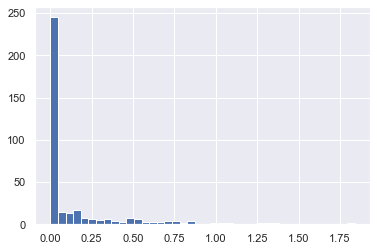

In [17]:
plt.hist(inches, 40)

This histogram gives us a general idea of what the data looks like: despite its reputation, the vast majority of days in Seattle saw near zero measured rainfall in 2014. 

Combining masking with aggregations, we can answer some specified questions:

In [40]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


In [45]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315
